In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning);

import sys
sys.executable

'/home/mingrui/anaconda3/envs/py36_cu90/bin/python'

In [3]:
import os
import glob
import shutil
from random import shuffle

# plotting
import PIL
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15, 15]

import deephistopath.wsi.slide as slide

import py_wsi
import py_wsi.imagepy_toolkit as tk

from wsi_utils import multiprocessing_pipeline, file_stats, filter_slide_entropy

import pandas as pd
pd.set_option('display.max_columns',None)

In [4]:
of_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus'
of_db_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus'
of_db = 'out_of_focus_db'

turtle_of = py_wsi.Turtle(of_dir, of_dir, of_db)

1 WSI found in directory.


In [5]:
print("Total WSI images:    " + str(turtle_of.num_files))
print("LMDB name:           " + str(turtle_of.db_name))
print("File names:          " + str(turtle_of.files))

Total WSI images:    1
LMDB name:           out_of_focus_db
File names:          ['69248(8).svs']


Openslide info:

Level count: 4
Level dimensions: ((71711, 69481), (17927, 17370), (4481, 4342), (2240, 2171))
Level downsamples: (1.0, 4.000112457934451, 16.00271012230256, 32.008992420379016)
Dimensions: (71711, 69481)
Objective power: 40
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=710x682 at 0x7F0D9BFA8A58>
  macro: <PIL.Image.Image image mode=RGBA size=1600x616 at 0x7F0D9BFA8630>
  thumbnail: <PIL.Image.Image image mode=RGBA size=792x768 at 0x7F0D9BFA8A58>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 40
  Property: aperio.DSR ID, value: D794XS72
  Property: aperio.Date, value: 08/24/17
  Property: aperio.DisplayColor, value: 0
  Property: aperio.Exposure Scale, value: 0.000001
  Property: aperio.Exposure Time, value: 45
  Property: aperio.Filename, value: 91986
  Property: aperio.Focus Offset, value: -0.000500
  Property: aperio.ICC Profile, value: AT2
  Property: aperio.ImageID, value: 91986
  Property: aperio.Left, value: 19.705435
  Property

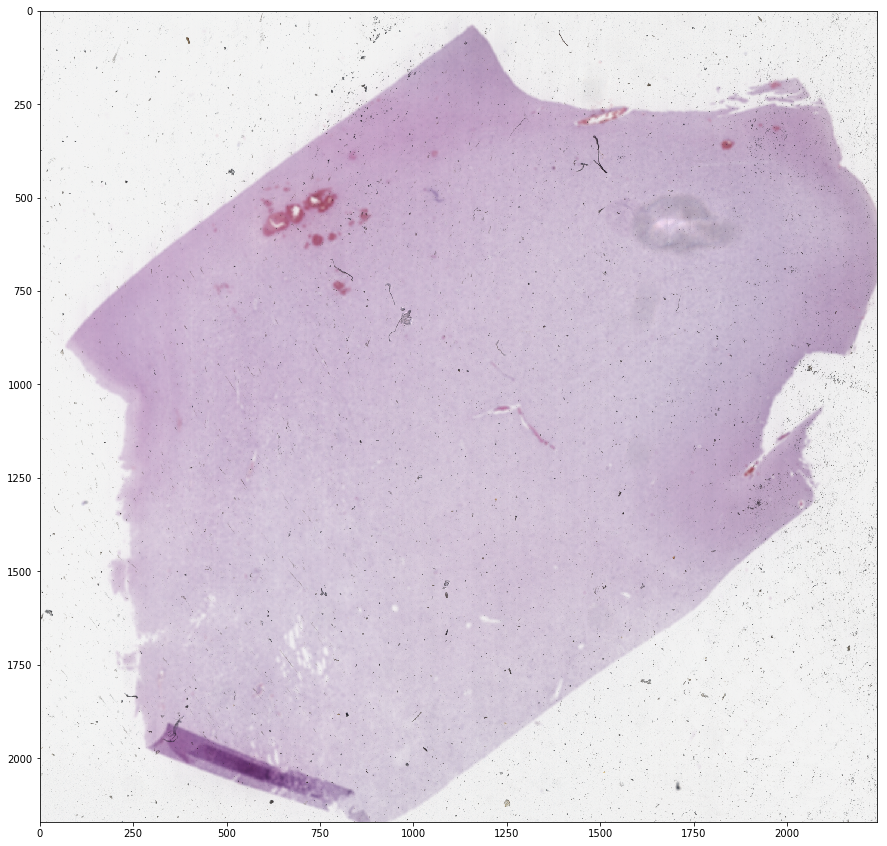

In [6]:
file_stats(of_dir, '69248(8).svs')

In [8]:
filter_slide_entropy(of_dir, turtle_of.files)

/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus/69248(8).svs
Opening Slide #1: /media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus/69248(8).svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
Saving image to: /media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus/training_png/69248(8).svs-001-32x-71711x69481-2240x2171.png
Done converting slide 1
Time elapsed: 0:00:04.907839
Applying filters to images (multiprocess)

Processing slide #1
/media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
RGB                  | Time: 0:00:00.190124  Type: uint8   Shape: (2171, 2240, 3)
Save Image           | Time: 0:00:02.615230  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/out-of-focus/filter_png/69248(8).svs-001-001-rgb.png
Save Thumbnail       | Time:

In [ ]:
tile_df = pd.read_csv('out-of-focus/tile_data/69248(8).svs-001-32x-71711x69481-2240x2171-tile_data.csv', skiprows=13)
tile_df.head()

In [ ]:
score_df = tile_df[tile_df['Score'] > 0.5]

In [ ]:
score_df.shape
score_df.head()